<a href="https://colab.research.google.com/github/marcelounb/Deep_Learning_with_python_JasonBrownlee/blob/master/20_1_Improve_Model_Performance_With_Image_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Improve Model Performance With Image Augmentation**

Data preparation is required when working with neural network and deep learning models. Increasingly data augmentation is also required on more complex object recognition tasks. 

In this lesson you will discover how to use data preparation and data augmentation with your image datasets when developing and evaluating deep learning models in Python with Keras. After completing this lesson, you will know:

. About the image augmentation API provide by Keras and how to use it with your models.

. How to perform feature standardization.

. How to perform ZCA whitening of your images.

. How to augment data with random rotations, shifts and ﬂips of images.

. How to save augmented image data to disk.

**20.1 Keras Image Augmentation API**

Like the rest of Keras, the image augmentation API is simple and powerful. Keras provides the ImageDataGenerator class that deﬁnes the conﬁguration for image data preparation and augmentation. This includes capabilities such as:

. Feature-wise standardization.
ZCA whitening.

. Random rotation, shifts, shear and ﬂips.

. Dimension reordering.

. Save augmented images to disk.

An augmented image generator can be created as follows:

    datagen = ImageDataGenerator()

Rather than performing the operations on your entire image dataset in memory, the API is designed to be iterated by the deep learning model ﬁtting process, creating augmented image data for you just-in-time. 

This reduces your memory overhead, but adds some additional time cost during model training. After you have created and conﬁgured your ImageDataGenerator, you must ﬁt it on your data. This will calculate any statistics required to actually perform the transforms to your image data. 

You can do this by calling the fit() function on the data generator and pass it your training dataset.

    datagen.fit(train)

The data generator itself is in fact an iterator, returning batches of image samples when requested. We can conﬁgure the batch size and prepare the data generator and get batches of images by calling the flow() function.

    X_batch, y_batch = datagen.flow(train, train, batch_size=32)

Finally we can make use of the data generator. Instead of calling the fit() function on our model, we must call the fit_generator() function and pass in the data generator and the desired length of an epoch as well as the total number of epochs on which to train.

    fit_generator(datagen, samples_per_epoch=len(train), epochs=100)


# 20.2 Point of Comparison for Image Augmentation
Now that you know how the image augmentation API in Keras works, let’s look at some examples. We will use the **MNIST handwritten digit recognition** task in these examples (learn more in Section 19.1). To begin, let’s take a look at the ﬁrst 9 images in the training dataset.


In [1]:
# Plot of images as baseline for comparison 
from keras.datasets import mnist 
from matplotlib import pyplot as plt

# Standardize images across the dataset, mean=0, stdev=1 
from keras.datasets import mnist 
from keras.preprocessing.image import ImageDataGenerator 

# Save augmented images to file  (20.8)
import os 
# from keras import backend as K

Using TensorFlow backend.


In [2]:
# load data 
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

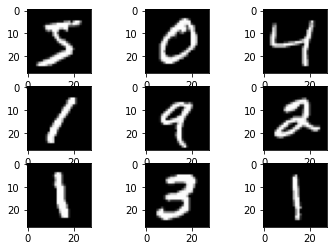

In [3]:
# create a grid of 3x3 images 
for i in range(0, 9): 
  plt.subplot(330 + 1 + i) 
  plt.imshow(X_train[i], cmap=plt.get_cmap( 'gray' ))
# show the plot
plt.show()

# 20.3 Feature Standardization
It is also possible to standardize pixel values across the entire dataset. This is called feature standardization and mirrors the type of standardization often performed for each column in a tabular dataset. This is different to sample standardization described in the previous section as pixel values are standardized across all samples (all images in the dataset). In this case each image is considered a feature. You can perform feature_standardization by setting the featurewise center and featurewise_std_normalization arguments on the ImageDataGenerator class

In [4]:
# reshape to be [samples][width][height] [pixels]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1) 
# convert from int to float 
X_train = X_train.astype( 'float32' ) 
X_test = X_test.astype( 'float32' ) 

In [5]:
# define data preparation 
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True) 

In [6]:
# fit parameters from data 
datagen.fit(X_train) 

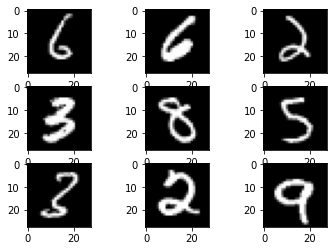

In [7]:
# configure batch size and retrieve one batch of images 
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9): 
  # create a grid of 3x3 images 
  for i in range(0, 9): 
    plt.subplot(330 + 1 + i) 
    plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap( 'gray' )) 
  # show the plot 
  plt.show() 
  break

Running this example you can see that the effect on the actual images, seemingly darkening and lightening different digits.

# 20.4 ZCA Whitening
A whitening transform of an image is a linear algebra operation that reduces the redundancy in the matrix of pixel images. Less redundancy in the image is intended to better highlight the structures and features in the image to the learning algorithm. Typically, image whitening is performed using the Principal Component Analysis (PCA) technique. More recently, an alternative called ZCA (learn more in Appendix A of this tech report2) shows better results and results in transformed images that keeps all of the original dimensions and unlike PCA, resulting transformed images still look like their originals. You can perform a ZCA whitening transform by setting the zca whitening argument to True.


In [8]:
# define data preparation 
datagen = ImageDataGenerator(zca_whitening=True) 

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:337: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


In [9]:
# fit parameters from data 
datagen.fit(X_train) 

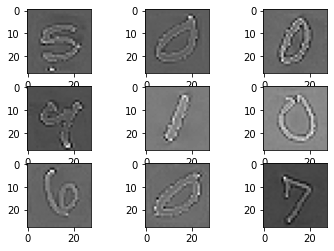

In [10]:
# configure batch size and retrieve one batch of images 
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9): 
  # create a grid of 3x3 images 
  for i in range(0, 9): 
    plt.subplot(330 + 1 + i) 
    plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap( 'gray' )) 
  # show the plot 
  plt.show() 
  break

Running the example, you can see the same general structure in the images and how the outline of each digit has been highlighted.

# 20.5 Random Rotations
Sometimes images in your sample data may have varying and different rotations in the scene. You can train your model to better handle rotations of images by artiﬁcially and randomly rotating images from your dataset during training. The example below creates random rotations of the MNIST digits up to 90 degrees by setting the rotation range argument.


In [11]:
# define data preparation 
datagen = ImageDataGenerator(rotation_range=90)

In [12]:
# fit parameters from data 
datagen.fit(X_train)

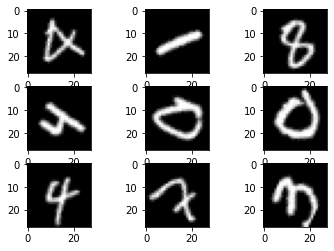

In [13]:
# configure batch size and retrieve one batch of images 
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9): 
  # create a grid of 3x3 images 
  for i in range(0, 9): 
    plt.subplot(330 + 1 + i) 
    plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap( 'gray' )) 
  # show the plot 
  plt.show() 
  break

# 20.6 Random Shifts
Objects in your images may not be centered in the frame. They may be off-center in a variety of di↵erent ways. You can train your deep learning network to expect and currently handle off-center objects by artiﬁcially creating shifted versions of your training data. Keras supports separate horizontal and vertical random shifting of training data by the width shift range and height shift range arguments.


In [14]:
# define data preparation 
shift = 0.25
datagen = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)

In [15]:
# fit parameters from data 
datagen.fit(X_train)

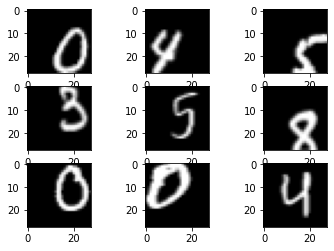

In [16]:
# configure batch size and retrieve one batch of images 
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9): 
  # create a grid of 3x3 images 
  for i in range(0, 9): 
    plt.subplot(330 + 1 + i) 
    plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap( 'gray' )) 
  # show the plot 
  plt.show() 
  break

# 20.7 Random Flips
Another augmentation to your image data that can improve performance on large and complex problems is to create random ﬂips of images in your training data. Keras supports random ﬂipping along both the vertical and horizontal axes using the vertical flip and horizontal flip arguments


In [17]:
# define data preparation 
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)

In [18]:
# fit parameters from data 
datagen.fit(X_train)

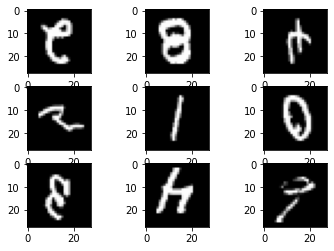

In [19]:
# configure batch size and retrieve one batch of images 
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9): 
  # create a grid of 3x3 images 
  for i in range(0, 9): 
    plt.subplot(330 + 1 + i) 
    plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap( 'gray' )) 
  # show the plot 
  plt.show() 
  break

# 20.8 Saving Augmented Images to File
The data preparation and augmentation is performed just-in-time by Keras. This is efficient in terms of memory, but you may require the exact images used during training. 

For example, perhaps you would like to use them with a different software package later or only generate them once and use them on multiple di↵erent deep learning models or conﬁgurations. 

Keras allows you to save the images generated during training. The directory, ﬁlename preﬁx and image ﬁle type can be speciﬁed to the flow() function before training. Then, during training, the generated images will be written to ﬁle. The example below demonstrates this and writes 9 images to a images subdirectory with the preﬁx aug and the ﬁle type of PNG.


In [21]:
# define data preparation 
datagen = ImageDataGenerator()

In [22]:
# fit parameters from data 
datagen.fit(X_train) 

In [23]:
# configure batch size and retrieve one batch of images 
os.makedirs( 'images' ) 

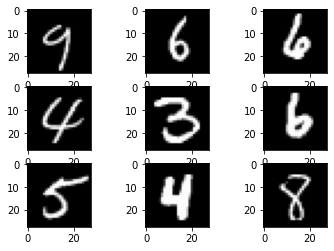

In [24]:
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9, save_to_dir='images', save_prefix='aug', save_format='png'):
  # create a grid of 3x3 images 
  for i in range(0, 9): 
    plt.subplot(330 + 1 + i) 
    plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap( 'gray' )) 
  # show the plot 
  plt.show() 
  break

# 20.9 Tips For Augmenting Image Data with Keras
Image data is unique in that you can review the transformed copies of the data and quickly get an idea of how the model may be perceive it by your model. Below are some times for getting the most from image data preparation and augmentation for deep learning.


*   Review Dataset. Take some time to review your dataset in great detail. Look at the images. Take note of image preparation and augmentations that might beneﬁt the training process of your model, such as the need to handle di↵erent shifts, rotations or ﬂips of objects in the scene.

*   Review Augmentations. Review sample images after the augmentation has been performed. It is one thing to intellectually know what image transforms you are using, it is a very different thing to look at examples. Review images both with individual augmentations you are using as well as the full set of augmentations you plan to use in aggregate. You may see ways to simplify or further enhance your model training process.
*   Evaluate a Suite of Transforms. Try more than one image data preparation and augmentation scheme. Often you can be surprised by results of a data preparation scheme you did not think would be beneﬁcial.







